In [1]:
import sys
sys.path.append('../../')

In [2]:

from config.constants import *
from backtesting import Backtest, Strategy
from backtesting.test import EURUSD, SMA 
from backtesting.lib import plot_heatmaps, resample_apply
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.ATR import *
from util.plot_return import *

In [39]:
XAUUSD = {}
XAUUSD['D1'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['D1'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['H4'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['H4'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['H1'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['H1'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M30'] = pd.read_csv(
    PATH_DATA + SYMBOL['XAUUSD']['M30'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M15'] = pd.read_csv(
    PATH_DATA + SYMBOL['XAUUSD']['M15'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M5'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['M5'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M1'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['M1'] + '.csv', index_col='Time', parse_dates=True)

In [17]:
start_2007 = "2007-01-01"
start_2008 = "2008-01-01"
start_2009 = "2009-01-01"
start_2010 = "2010-01-01"
start_2011 = "2011-01-01"
start_2012 = "2012-01-01"
start_2013 = "2013-01-01"
start_2014 = "2014-01-01"
start_2015 = "2015-01-01"
start_2016 = "2016-01-01"
start_2017 = "2017-01-01"
start_2018 = "2018-01-01"
start_2019 = "2019-01-01"
start_2020 = "2020-01-01"
start_2021 = "2021-01-01"
start_2022 = "2022-01-01"
start_2023 = "2023-01-01"

end_2007 = "2007-01-01"
end_2008 = "2008-01-01"
end_2009 = "2009-01-01"
end_2010 = "2010-01-01"
end_2011 = "2011-01-01"
end_2012 = "2012-01-01"
end_2013 = "2013-01-01"
end_2014 = "2014-01-01"
end_2015 = "2015-01-01"
end_2016 = "2016-01-01"
end_2017 = "2017-01-01"
end_2018 = "2018-01-01"
end_2019 = "2019-01-01"
end_2020 = "2020-01-01"
end_2021 = "2021-01-01"
end_2022 = "2022-01-01"
end_2023 = "2023-01-01"


In [23]:
XAUUSD['D1']

,Open,High,Low,Close,Volume
Time,,,,,
2007-01-01,635.679,637.103,635.006,635.943,604
2007-01-02,635.791,640.802,635.286,639.143,1282
2007-01-03,639.029,644.663,624.634,626.602,1302
2007-01-04,626.699,630.352,619.600,622.533,1365
2007-01-05,622.268,625.768,601.591,606.841,1284
...,...,...,...,...,...
2023-03-06,1852.255,1858.168,1845.015,1846.255,1380
2023-03-07,1846.225,1851.555,1812.655,1813.865,1380
2023-03-08,1813.855,1824.185,1809.248,1815.175,1379


In [24]:
class Momentum(Strategy) :
    ATR_SL = 6
    max_dir_count = 2
    def init(self):
        self.data.df['ATR'] = ATR(self.data.df, 20)['ATR']
        self.data.df['direction'] = np.where(self.data.Close > self.data.Open, 'bull', 'bear')
        self.data.df['dir_count'] = self.data.df.groupby((self.data.df['direction'] != self.data.df['direction'].shift(1)).cumsum()).cumcount()+1
        
    

    def next(self):
        current_dir_count = self.data.df.loc[self.data.df.index[-1], 'dir_count']
        current_direction = self.data.df.loc[self.data.df.index[-1], 'direction']
        current_ATR = self.data.df.loc[self.data.df.index[-1], 'ATR']
        
        if current_dir_count >= self.max_dir_count and current_direction == 'bull' and not self.position and not np.isnan(current_ATR):
            if self.position.is_long :
                print('Have a order')
            tp = self.data.Close[-1] + current_ATR * self.ATR_SL
            sl = self.data.Open[-1]  - 0.001
              
                # Place your buy logic here
            
            self.buy(sl=sl, tp=tp, size= 1)
        if current_dir_count >= self.max_dir_count and current_direction == 'bear' and not self.position and not np.isnan(current_ATR):
            tp = self.data.Close[-1] - current_ATR * self.ATR_SL
            sl = self.data.Open[-1] + 0.001
               
            
           
            self.sell(sl=sl, tp=tp, size= 1)

In [6]:
account_size = 20000

Optimization

D1

In [25]:
bt_D1 = Backtest(XAUUSD['D1'],Momentum, cash=account_size, margin=1/2000, )
result = bt_D1.run()
result

Start                     2007-01-01 00:00:00
End                       2023-03-10 00:00:00
Duration                   5912 days 00:00:00
Exposure Time [%]                   88.082491
Equity Final [$]                   19436.2294
Equity Peak [$]                    20318.3702
Return [%]                          -2.818853
Buy & Hold Return [%]               193.12344
Return (Ann.) [%]                    -0.14278
Volatility (Ann.) [%]                0.911034
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -5.012349
Avg. Drawdown [%]                   -0.413309
Max. Drawdown Duration     5323 days 00:00:00
Avg. Drawdown Duration      309 days 00:00:00
# Trades                                  500
Win Rate [%]                              9.2
Best Trade [%]                      17.196177
Worst Trade [%]                     -9.888391
Avg. Trade [%]                    

In [28]:
optimize, heatmap =  bt_D1.optimize(
    ATR_SL = range(1,15,1),
    max_dir_count = range(2,10,1),
    maximize='Sharpe Ratio',
    return_heatmap= True,
    # max_tries=10

)

  0%|          | 0/8 [00:00<?, ?it/s]

In [29]:
optimize

Start                     2007-01-01 00:00:00
End                       2023-03-10 00:00:00
Duration                   5912 days 00:00:00
Exposure Time [%]                   44.199881
Equity Final [$]                   20843.8282
Equity Peak [$]                    21133.3988
Return [%]                           4.219141
Buy & Hold Return [%]               193.12344
Return (Ann.) [%]                    0.206719
Volatility (Ann.) [%]                0.645374
Sharpe Ratio                         0.320308
Sortino Ratio                          0.4587
Calmar Ratio                         0.093539
Max. Drawdown [%]                   -2.209973
Avg. Drawdown [%]                   -0.249166
Max. Drawdown Duration     2135 days 00:00:00
Avg. Drawdown Duration      114 days 00:00:00
# Trades                                  243
Win Rate [%]                         8.641975
Best Trade [%]                      23.260701
Worst Trade [%]                     -4.250717
Avg. Trade [%]                    

In [32]:
optimize['_strategy']

<Strategy Momentum(ATR_SL=8,max_dir_count=4)>

In [33]:
heatmap

ATR_SL  max_dir_count
1       2                0.000000
        3                0.000000
        4                0.000000
        5                0.000000
        6                0.227751
                           ...   
14      5                0.002117
        6                0.000000
        7                0.000000
        8                0.000000
        9                0.000000
Name: Sharpe Ratio, Length: 112, dtype: float64

In [34]:
hm = heatmap.groupby(["ATR_SL","max_dir_count"]).mean().unstack()

In [41]:
hm

max_dir_count,2,3,4,5,6,7,8,9
ATR_SL,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.227751,0.119626,0.029822,0.000000
2,0.103240,0.289891,0.199325,0.000000,0.062927,0.000000,0.000000,0.000000
3,0.053383,0.004541,0.028304,0.000000,0.000000,0.000000,0.000000,0.012435
4,0.040814,0.000000,0.115727,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.020286,0.212833,0.000000,0.060922,0.000000,0.000000,0.000000
6,0.000000,0.216491,0.245715,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.176569,0.303280,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.166716,0.320308,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.109242,0.159170,0.000000,0.000000,0.000000,0.000000,0.000000


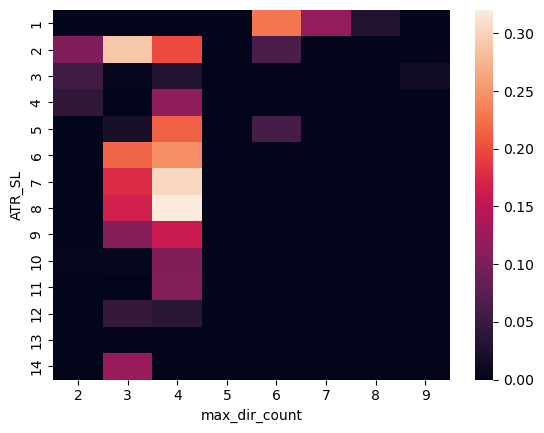

In [36]:
sns.heatmap(hm)
plt.show()

In [37]:
plot_heatmaps(heatmap, agg='mean',filename='../Strategy+8+-+Momentum.ipynb/Momentum_plot_heatmaps_.html')

Column(id='1050', ...)

H4

In [40]:
bt_H4 = Backtest(XAUUSD['H4'], Momentum, cash=account_size, margin=1/2000, )
result = bt_H4.run()
result

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                   90.822298
Equity Final [$]                   22629.5531
Equity Peak [$]                    22684.7231
Return [%]                          13.147766
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                    0.619164
Volatility (Ann.) [%]                0.883748
Sharpe Ratio                         0.700611
Sortino Ratio                        1.122711
Calmar Ratio                         0.313243
Max. Drawdown [%]                   -1.976626
Avg. Drawdown [%]                   -0.112835
Max. Drawdown Duration      812 days 04:00:00
Avg. Drawdown Duration       18 days 20:00:00
# Trades                                 2157
Win Rate [%]                         11.49745
Best Trade [%]                      14.142366
Worst Trade [%]                     -5.204921
Avg. Trade [%]                    

In [48]:
optimize, heatmap = bt_H4.optimize(
    ATR_SL=range(1, 15, 1),
    max_dir_count=range(2, 10, 1),
    maximize='Sharpe Ratio',
    return_heatmap=True,
    max_tries=5

)

  0%|          | 0/5 [00:00<?, ?it/s]

In [49]:
optimize

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                   15.163998
Equity Final [$]                   20002.7082
Equity Peak [$]                    20403.5312
Return [%]                           0.013541
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                    0.000677
Volatility (Ann.) [%]                0.342798
Sharpe Ratio                         0.001974
Sortino Ratio                        0.002846
Calmar Ratio                         0.000344
Max. Drawdown [%]                   -1.964479
Avg. Drawdown [%]                   -0.137127
Max. Drawdown Duration     3172 days 08:00:00
Avg. Drawdown Duration      108 days 16:00:00
# Trades                                  351
Win Rate [%]                         5.698006
Best Trade [%]                       8.923872
Worst Trade [%]                     -2.410296
Avg. Trade [%]                    

In [46]:
optimize['_strategy']

<Strategy Momentum(ATR_SL=9,max_dir_count=2)>

In [47]:
heatmap

ATR_SL  max_dir_count
2       6                0.000000
4       7                0.000000
9       2                0.157647
Name: Sharpe Ratio, dtype: float64